# 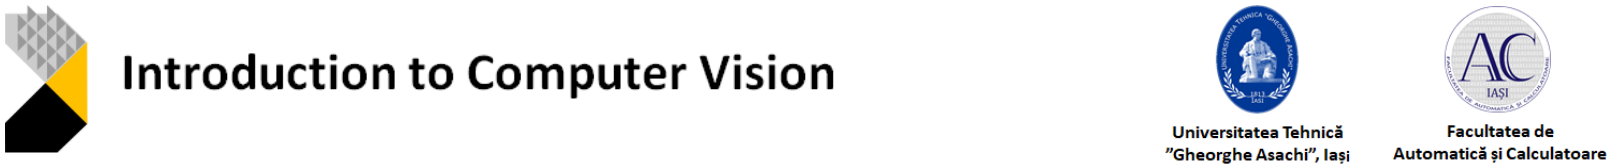

  The Intro to Computer Vision labs will be run in Google Colaboratory, a Jupyter notebook environment that runs entirely in the cloud, you don't need to download anything. To run these labs, you must have a Google account.

Step 1: click on the assignment invite link -> **Accept this assignment**. Refresh page -> individual repo for the specific assignment is created automatically

Step 2: Navigate to http://colab.research.google.com/github -> Click the **Include Private Repos** checkbox -> **select the correct repo** (SistemeDeVedereArtificiala/assignment_name-student_name) -> Click on the jupyter notebook of the current assignment

Step 3: [GitHub sign-in window] In the popup window, sign-in to your Github account and authorize Colab to read the private files.

Step 4: [in colab] **File** -> **Save a copy to GitHub**. Select the correct repository for the SPECIFIC assignment -> Click the **Include Colab Link** -> Click **OK**

Step 5: [in colab] Navigate to the **Runtime** tab --> **Change runtime type**, under **Hardware accelerator** select **GPU/TPU** (tensor processing unit) according to your needs. 
  
  <font color='red'>Read the suggestions and accomplish all tasks marked with **#TODO**.

!!! At the end of each laboratory **REPEAT step 4 in order to SAVE** the answers to your private repository (individual for each assignment)</font>

# Project 4: Obstacles detection based on disparity maps

## Week 1: Depth estimation and 3D reconstruction based on disparity maps

**Stereo Vision**

Before getting into details let's test our stereo vision - try  [The Eye Hop](https://www.vision3d.com/ehop.html) and [The Framing Game](https://www.vision3d.com/frame.html)


<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=1ZdNCG4ScJ8QTU2x_8ak0VCWZV-JWpjzm' />
<figcaption>Stereo vision: the object P is observed from two cameras. The object's position is different in both images.
</figcaption></center>
</figure>



### Disparity computation (stereo matching)

In [32]:
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt

Paths to left images:
['left/000009.png', 'left/000015.png', 'left/000007.png', 'left/000010.png', 'left/000014.png', 'left/000011.png', 'left/000008.png', 'left/000005.png', 'left/000013.png', 'left/000006.png', 'left/000012.png']

Paths to right images:
['right/000009.png', 'right/000015.png', 'right/000007.png', 'right/000010.png', 'right/000014.png', 'right/000011.png', 'right/000008.png', 'right/000005.png', 'right/000013.png', 'right/000006.png', 'right/000012.png']


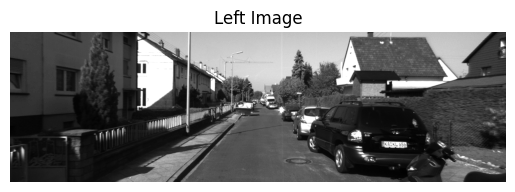

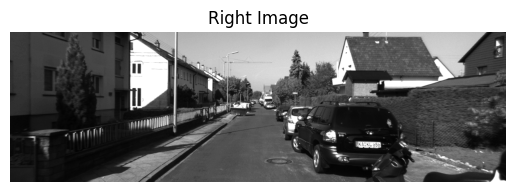

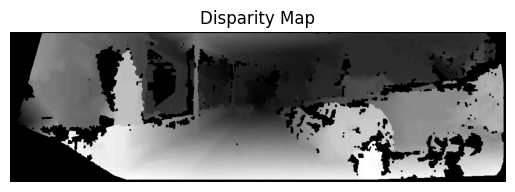

In [33]:
#TO DO: 
#(1) load the stereo images provided and compute the disparity map using: (I) the Block-Matching algorithm, (II) the Semi-Global Block Matching algorithm
#(2) load the precomputed disparity maps and compare the three results
# https://drive.google.com/drive/folders/1q59CF5S0zKB5jPv9L8An-hrQur9OHKc7?usp=sharing

#load left and right image
disparity_path = "disparity"
left_img_path = "left"
right_img_path = "right"


#display left and right image
# List all image files in the left and right folders
left_img_files = [os.path.join(left_img_path, filename) for filename in os.listdir(left_img_path) if filename.endswith('.png')]
right_img_files = [os.path.join(right_img_path, filename) for filename in os.listdir(right_img_path) if filename.endswith('.png')]
disparity_img_files = [os.path.join(disparity_path, filename) for filename in os.listdir(disparity_path) if filename.endswith('.png')]

# Display paths to all images
print("Paths to left images:")
print(left_img_files)
print("\nPaths to right images:")
print(right_img_files)

left_img = cv2.imread(left_img_files[0], cv2.IMREAD_GRAYSCALE)
right_img = cv2.imread(right_img_files[0], cv2.IMREAD_GRAYSCALE)
disparity_img = cv2.imread(disparity_img_files[0], cv2.IMREAD_GRAYSCALE)

if left_img_files:
    plt.imshow(left_img, cmap='gray')
    plt.title("Left Image")
    plt.axis('off')
    plt.show()

if right_img_files:
    plt.imshow(right_img, cmap='gray')
    plt.title("Right Image")
    plt.axis('off')
    plt.show()
    
if disparity_img_files:
    plt.imshow(disparity_img, cmap='gray')
    plt.title("Disparity Map")
    plt.axis('off')
    plt.show()

**The Block-Matching algorithm**

Estimates disparity at a point by comparing a small
region about that point with congruent regions
extracted from the other image

Three classes of metrics used for the comparison:
*   Correlation (NCC - normalized Cross Correlation)
*   Intensity difference (SAD - Sum of Absolute Differences, SSD - Sum of Squared Differences)
*   Rank (rank transform, census transform)

<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=1R4z_VFQQeoVjPBXoqQSKRpo-O5J7mY9r' />
<figcaption>Slide a window along the epipolar line and compare contents of that window with the refence window in the lef image.</figcaption></center>
</figure>


<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=194nLEeE-69RNIqfIOyxCUohIY1jB9Z4H' />
<figcaption>Results using different metrics</figcaption></center>
</figure>


**The effect of window size**

<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=1zlKsLhCaTsq61Npba537DoP99fsQQLqq' />
<figcaption></figcaption></center>
</figure>

*   smaller window: more detail(+), more noise(-)
*   larger windows: smooter disparity maps(+), less detail(-), fails near boundaries(-)

Generally, stereo block matching will fail for *textureless regions*, *repeated patterns* and *specularities*.



In [34]:
def blockMatching(left, right, window_size):
    window_size = max(5, min(window_size, 255))
    if window_size % 2 == 0:
        window_size += 1
    
    # Convert color images to grayscale images
    # images are already grayscale images
    left_gray = left
    right_gray = right
    
    # Apply the Block-Matching algorithm
    stereo = cv2.StereoBM().create(blockSize=window_size)
    disparity = stereo.compute(left_gray, right_gray)
    
    return disparity

**The Semi-Global Block Matching algorithm**

Semi-global matching uses information from neighboring pixels in multiple directions to calculate the disparity of a pixel. Analysis in multiple directions results in a lot of computation. Instead of using the whole image, the disparity of a pixel can be calculated by considering a smaller block of pixels for ease of computation. Thus, the Semi-Global Block Matching (SGBM) algorithm uses block-based cost matching that is smoothed by path-wise information from multiple directions.
Using the block-based approach, this algorithm estimates an approximate disparity of a pixel in the left image from the same pixel in the right image.


In [35]:
def sgBlockMatching(left, right, block_size):
    # Ensure block size is odd and within the valid range
    block_size = max(5, min(block_size, 255))
    if block_size % 2 == 0:
        block_size += 1
            
    # Convert color images to grayscale images
    # images are already grayscale images
    left_gray = left
    right_gray = right
    
    # Stereo SGBM object creation
    stereo = cv2.StereoSGBM().create(blockSize=block_size)
    
    # Compute the disparity map
    disparity = stereo.compute(left_gray, right_gray)
    
    return disparity

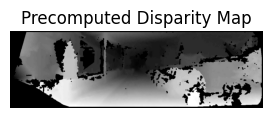

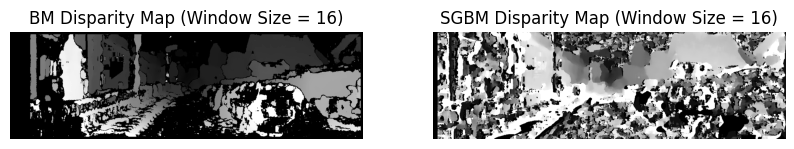

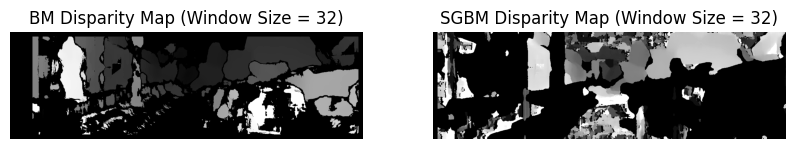

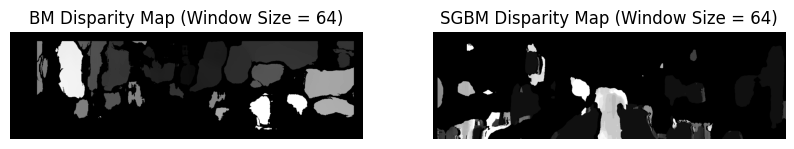

In [36]:
if left_img is None or right_img is None or disparity_img is None:
    exit(0)

# #TO DO: 
# #(1)compute disparity maps using the Block-Matching and Semi-Global Block Matching algorithms
# #(2)load the precomputed disparity maps and compare the three results
# #(3)change the window size and compare the results (e.g., w = 32, w = 64)
# display results

# Window sizes to try
window_sizes = [16, 32, 64]

# Display precomputed disparity map
plt.figure(figsize=(15, 4))
plt.subplot(141)
plt.imshow(disparity_img, cmap='gray')
plt.title('Precomputed Disparity Map')
plt.axis('off')

# Display results for each window size
for window_size in window_sizes:
    # Compute disparity maps using Block-Matching and Semi-Global Block Matching algorithms
    disparity_bm = blockMatching(left_img, right_img, window_size)
    disparity_sgbm = sgBlockMatching(left_img, right_img, window_size)

    # Display results
    plt.figure(figsize=(10, 4))

    plt.subplot(121)
    plt.imshow(disparity_bm, cmap='gray')
    plt.title(f'BM Disparity Map (Window Size = {window_size})')
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(disparity_sgbm, cmap='gray')
    plt.title(f'SGBM Disparity Map (Window Size = {window_size})')
    plt.axis('off')

    plt.show()

### Depth from disparity

We saw that if we have two images of same scene, we can get depth information from that in an intuitive way. Below is an image and some simple mathematical formulas which proves that intuition.
<figure>
<center>
<img src='https://docs.opencv.org/3.1.0/stereo_depth.jpg' />
</center>
</figure>

The above diagram contains equivalent triangles. Writing their equivalent equations will yield us following result:

$$disparity=x−x′=\frac{Bf}{Z}$$
$x$ and $x′$ are the distance between points in image plane corresponding to the scene point 3D and their camera center. $B$ is the distance between two cameras (which we know) and $f$ is the focal length of camera (already known). So in short, above equation says that the $depth$ of a point in a scene is inversely proportional to the difference in distance of corresponding image points and their camera centers. So with this information, we can derive the depth of all pixels in an image. [text source: docs.opencv.org/4.2.0/ ]

In [37]:
#KITTI dataset
baseline = 0.571
focalLength = 645.2
c_u = 635.9
c_v = 194.1

/tmp/ipykernel_17138/15406937.py:6: RuntimeWarning: divide by zero encountered in divide
  depth_map = (focalLength * baseline) / disparity_img


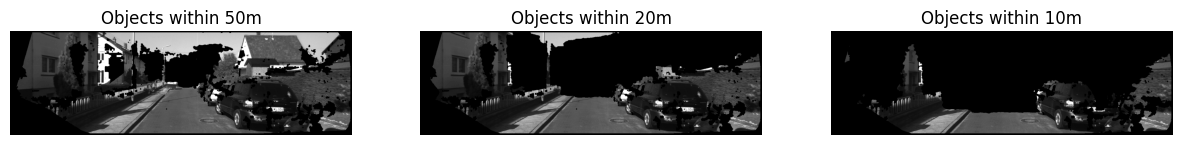

In [38]:
#TO DO: 
#(1) compute depth map from disparity map using the formula: depth = (focalLength * baseline)/disparity
#(2) use the depth map to show only object within 10m/20m/50m (Tip: apply depth threshold for each pixel)

# Compute depth map from disparity map
depth_map = (focalLength * baseline) / disparity_img

#objects within 50m
objects_within_50m = np.where(depth_map <= 50, 255, 0).astype(np.uint8)
    
#objects within 20m
objects_within_20m = np.where(depth_map <= 20, 255, 0).astype(np.uint8)

#objects within 10m
objects_within_10m = np.where(depth_map <= 10, 255, 0).astype(np.uint8)

# Convert objects within certain distances to images
objects_within_50m_img = cv2.bitwise_and(left_img, left_img, mask=objects_within_50m.astype(np.uint8))
objects_within_20m_img = cv2.bitwise_and(left_img, left_img, mask=objects_within_20m.astype(np.uint8))
objects_within_10m_img = cv2.bitwise_and(left_img, left_img, mask=objects_within_10m.astype(np.uint8))

# Display the objects within certain distances
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(objects_within_50m_img, cmap='gray')
plt.title('Objects within 50m')
plt.axis('off')

plt.subplot(132)
plt.imshow(objects_within_20m_img, cmap='gray')
plt.title('Objects within 20m')
plt.axis('off')

plt.subplot(133)
plt.imshow(objects_within_10m_img, cmap='gray')
plt.title('Objects within 10m')
plt.axis('off')

plt.show()

### Bonus: 3D pointcloud from disparity

Shape of depth_map: (376, 1241)
Shape of u: (376, 1241)
Shape of v: (376, 1241)
Principal point: (635.9, 194.1)
Focal length: 645.2
Minimum depth value: 0.0
Maximum depth value: 368.4092
Minimum X coordinate: -353.96289999999993
Maximum X coordinate: 53.68542
Minimum Y coordinate: -36.03009999999999
Maximum Y coordinate: 21.0699
Minimum Z coordinate: 0.0
Maximum Z coordinate: 368.4092


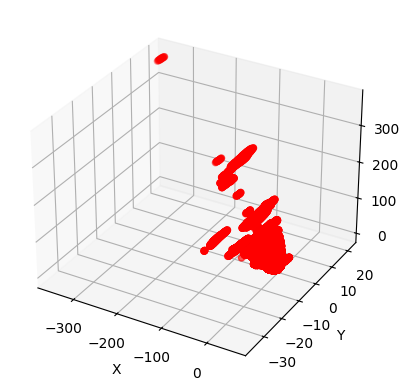

/tmp/ipykernel_17138/3048507835.py:39: RuntimeWarning: invalid value encountered in divide
  left_points = np.stack(((X / Z) * focal_length + principal_point[0], (Y / Z) * focal_length + principal_point[1]), axis=-1)


Shape of left_points: (376, 1241, 2)
Shape of right_points: (376, 1241, 2)


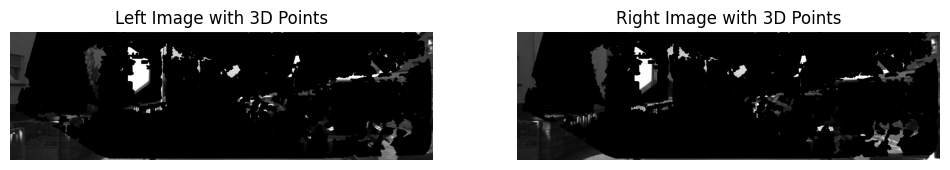

In [39]:
#TO DO: (1) using the precomputed depth map, compute 3D point coordinates
principal_point = (c_u, c_v)
focal_length = focalLength

# Create grid of pixel coordinates
u, v = np.meshgrid(np.arange(depth_map.shape[1]), np.arange(depth_map.shape[0]))
depth_map[np.isinf(depth_map)] = 0.0

# Compute 3D point coordinates
X = (u - principal_point[0]) * depth_map / focal_length
Y = (v - principal_point[1]) * depth_map / focal_length
Z = depth_map

print("Shape of depth_map:", depth_map.shape)
print("Shape of u:", u.shape)
print("Shape of v:", v.shape)
print("Principal point:", principal_point)
print("Focal length:", focal_length)

# Debugging statements
print("Minimum depth value:", np.min(depth_map))
print("Maximum depth value:", np.max(depth_map))
print("Minimum X coordinate:", np.min(X))
print("Maximum X coordinate:", np.max(X))
print("Minimum Y coordinate:", np.min(Y))
print("Maximum Y coordinate:", np.max(Y))
print("Minimum Z coordinate:", np.min(Z))
print("Maximum Z coordinate:", np.max(Z))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c='r', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Map 3D points to pixel coordinates in the left and right images
left_points = np.stack(((X / Z) * focal_length + principal_point[0], (Y / Z) * focal_length + principal_point[1]), axis=-1)
right_points = left_points - np.array([[baseline, 0]])  # Shift right points based on baseline

print("Shape of left_points:", left_points.shape)
print("Shape of right_points:", right_points.shape)

# Overlay 3D points onto the original left and right images
left_img_with_points = left_img.copy()
right_img_with_points = right_img.copy()

# Filter out invalid points
valid_indices = ~np.isnan(left_points[:, :, 0]) & ~np.isnan(left_points[:, :, 1])
left_points = left_points[valid_indices]

# Draw points on left image
for point in left_points:
    u, v = point.astype(int)
    cv2.circle(left_img_with_points, (u, v), radius=2, color=(0, 255, 0), thickness=-1)

# Filter out invalid points for right image
valid_indices_right = ~np.isnan(right_points[:, :, 0]) & ~np.isnan(right_points[:, :, 1])
right_points = right_points[valid_indices_right]

# Draw points on right image
for point in right_points:
    u, v = point.astype(int)
    cv2.circle(right_img_with_points, (u, v), radius=2, color=(0, 255, 0), thickness=-1)

# Display images with 3D points
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(left_img_with_points, cmap='gray')
plt.title('Left Image with 3D Points')
plt.axis('off')

plt.subplot(122)
plt.imshow(right_img_with_points, cmap='gray')
plt.title('Right Image with 3D Points')
plt.axis('off')

plt.show()